In [2]:
import matplotlib.pyplot as plt
from lmfit.models import SineModel, DampedHarmonicOscillatorModel, PolynomialModel
from matplotlib.pyplot import show

import numpy as np
from numpy import exp, loadtxt, pi, sqrt
from numpy import exp, sin, linspace, random
import scipy
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import leastsq, curve_fit
import lmfit
from lmfit import minimize, Parameters, Parameter
from lmfit import Model
from lmfit import models

import pandas as pd
import scipy.constants

In [6]:
'''EBIND'''
# Read specific columns from data file:
cols = {
    0: "ebind",  
    1: "coord_avg",  
    2: "sigma",
    3: "time",
    4: "press"
}
data = pd.read_csv(
    "coord_ebind.dat", sep=None, skiprows=1, skipfooter=9, usecols=cols.keys(), names=cols.values(), engine='python')

# Convert to dictionary of numpy arrays:
data = data.to_dict("series")
for key in data:
    data[key] = np.array(data[key].values)

print(data)

{'ebind': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'coord_avg': array([ 18.94934144, 100.1400818 , 203.34179894, 280.47816594,
       332.67632242, 367.28421053, 393.56574152, 412.06197655,
       431.52207792]), 'sigma': array([4.00424054, 6.2255301 , 4.8780248 , 4.52878629, 3.38452357,
       1.69052434, 1.92762583, 2.03274654, 1.28903866]), 'time': array([   80000,   125000,   290000,   435000,  1045000,  2640000,
        7180000, 20200000, 61600000]), 'press': array([7.62097896, 6.21920961, 5.36182159, 5.36182159, 3.23125334,
       3.93939274, 3.93939274, 4.35120922, 1.94868418])}


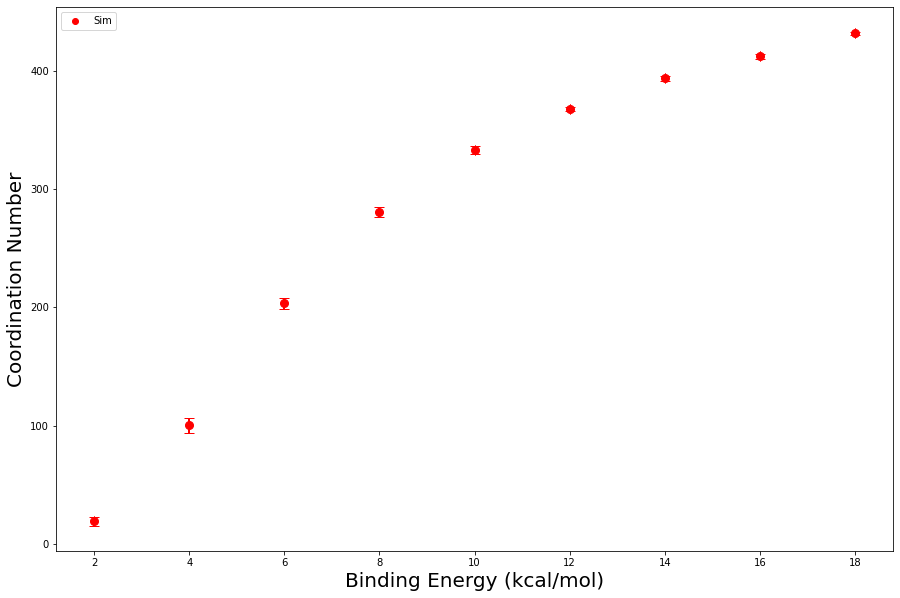

In [7]:
ebind = data["ebind"]
sigma = data["sigma"]


'''PLOT DATA'''
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(ebind, data["coord_avg"], "o", label="Sim", color="red", linestyle="none")
ax.errorbar(ebind, data["coord_avg"], fmt="o", xerr=0,yerr=sigma, color="red", lw=2, ms=8, zorder=666, capsize=5)

'''Plot Model'''
#ax.fill_between(ebind, data["coord_avg"] + sigma, data["coord_avg"] - sigma, color="#FFAAAA", lw=0, alpha=0.75, label = "1-sigma")


ax.set_xlabel("Binding Energy (kcal/mol)", fontsize=20)
ax.set_ylabel("Coordination Number", fontsize=20)

plt.legend(loc="upper left")
plt.savefig("figures/Coord_Ebind.png", bbox_inches="tight")
plt.show()

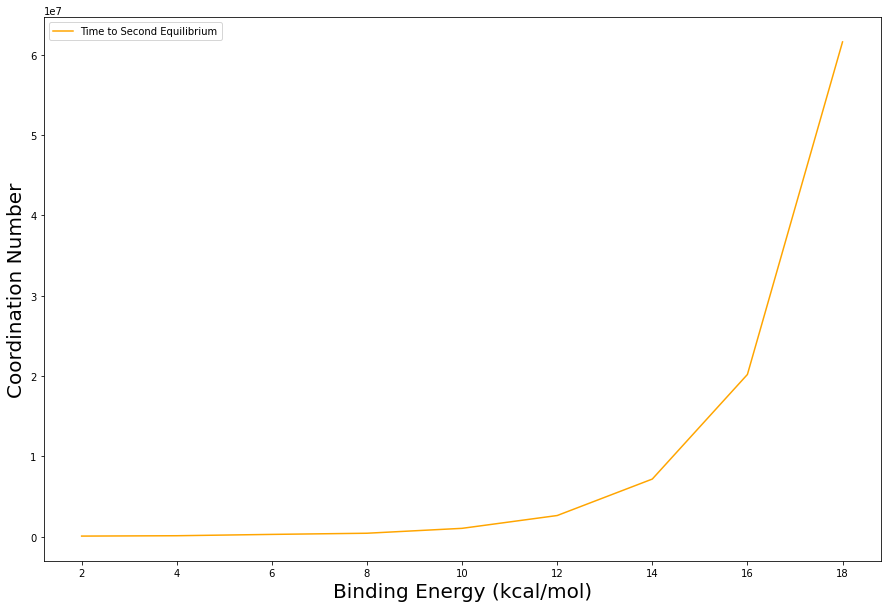

In [11]:
fig, ax = plt.subplots(figsize=[15, 10])

ax.plot(ebind, data["time"], label="Time to Second Equilibrium", color="orange", linestyle="solid")
ax.set_xlabel("Binding Energy (kcal/mol)", fontsize=20)
ax.set_ylabel("Coordination Number", fontsize=20)

plt.legend(loc="upper left")
plt.savefig("figures/Coord_Ebind.png", bbox_inches="tight")
plt.show()
plt.show()


In [34]:
'''Ligand number'''
# Read specific columns from data file:
cols = {
    0: "lig",  
    1: "coord_avg",  
    2: "sigma",
    3: "time",
}
data = pd.read_csv(
    "coord_lig.dat", sep=None, skiprows=1, skipfooter=0, usecols=cols.keys(), names=cols.values(), engine='python')

# Convert to dictionary of numpy arrays:
data = data.to_dict("series")
for key in data:
    data[key] = np.array(data[key].values)

print(data)

{'lig': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100]), 'coord_avg': array([ 99.147343  , 190.37725824, 239.34517045, 263.83572216,
       272.8956422 , 281.64674493, 286.32448037, 291.50498339,
         0.        ,   0.        , 301.16021505]), 'sigma': array([0.82584035, 3.25103475, 4.052487  , 4.16207552, 4.26793554,
       4.27151074, 3.55921356, 4.16427201, 0.        , 0.        ,
       4.11266624]), 'time': array([ 875000, 1500000, 1495000, 2350000,  655000, 1600000,  685000,
        500000,       0,       0,  365000])}


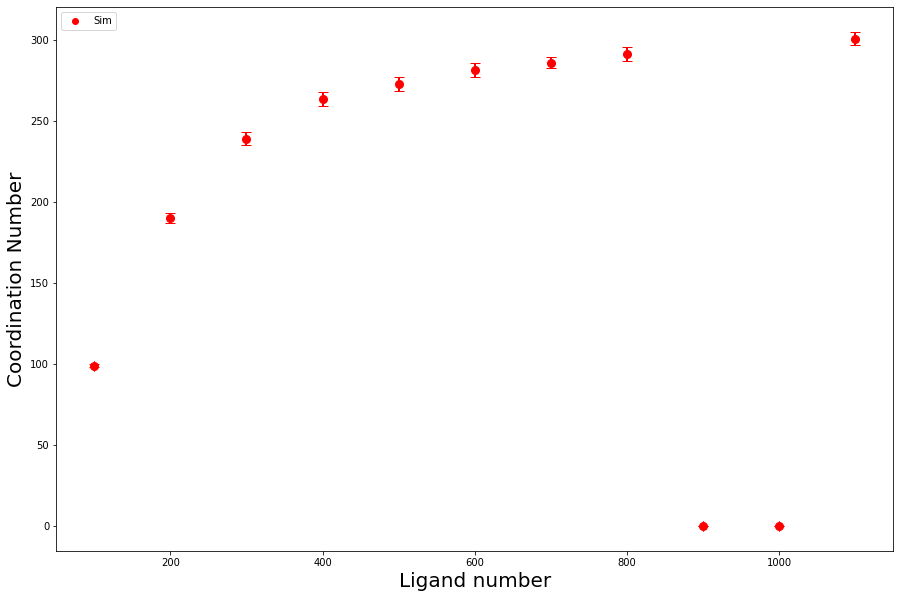

In [35]:
lig = data["lig"]
sigma = data["sigma"]


'''PLOT DATA'''
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(lig, data["coord_avg"], "o", label="Sim", color="red", linestyle="none")
ax.errorbar(lig, data["coord_avg"], fmt="o", xerr=0,yerr=sigma, color="red", lw=2, ms=8, zorder=666, capsize=5)

'''Plot Model'''
#ax.fill_between(lig, data["coord_avg"] + sigma, data["coord_avg"] - sigma, color="#FFAAAA", lw=0, alpha=0.75, label = "1-sigma")


ax.set_xlabel("Ligand number", fontsize=20)
ax.set_ylabel("Coordination Number", fontsize=20)

plt.legend(loc="upper left")
plt.savefig("figures/coord_lig.png", bbox_inches="tight")
plt.show()

In [36]:
'''s'''
# Read specific columns from data file:
cols = {
    0: "s",  
    1: "coord_avg",  
    2: "coord2_avg",
    3: "sigma",
    4: "sigma2",
    5: "time"
}
data = pd.read_csv(
    "coord_s.dat", sep=None, skiprows=1, skipfooter=0, usecols=cols.keys(), names=cols.values(), engine='python')

# Convert to dictionary of numpy arrays:
data = data.to_dict("series")
for key in data:
    data[key] = np.array(data[key].values)

print(data)

{'s': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'coord_avg': array([254.57109283, 280.78537736, 314.80839002, 339.35789474,
       354.75088132, 362.86503067, 367.18657938, 371.16216216,
       373.66787879, 376.36675127]), 'coord2_avg': array([ 0.28554642,  0.44929245,  1.0430839 ,  3.22210526,  8.89894242,
       15.02453988, 19.73486088, 25.04054054, 28.00848485, 32.38071066]), 'sigma': array([5.02891041, 4.61517167, 3.88842952, 3.51787784, 3.10354386,
       3.08148883, 2.81876905, 2.356028  , 2.42233709, 2.25981099]), 'sigma2': array([0.53535279, 0.64996556, 1.05918115, 1.76075224, 2.75239127,
       3.45957031, 3.8057436 , 4.05396921, 3.94515504, 4.3741453 ]), 'time': array([ 760000,  775000,  605000,  265000,  760000, 3385000, 1960000,
       3165000,  890000, 1075000])}


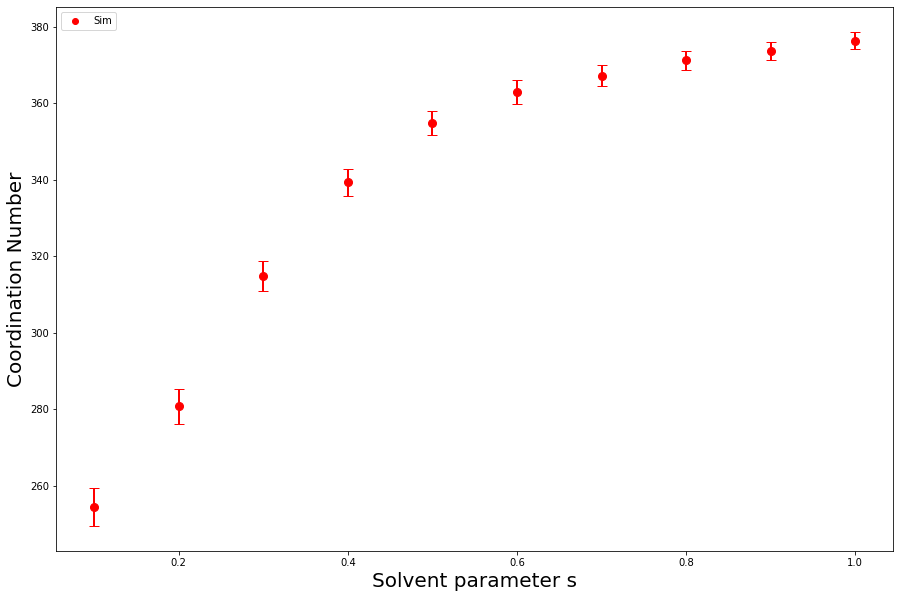

In [37]:
s = data["s"]
sigma = data["sigma"]


'''PLOT DATA'''
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(s, data["coord_avg"], "o", label="Sim", color="red", linestyle="none")
ax.errorbar(s, data["coord_avg"], fmt="o", xerr=0,yerr=sigma, color="red", lw=2, ms=8, zorder=666, capsize=5)

'''Plot Model'''
#ax.fill_between(s, data["coord_avg"] + sigma, data["coord_avg"] - sigma, color="#FFAAAA", lw=0, alpha=0.75, label = "1-sigma")


ax.set_xlabel("Solvent parameter s", fontsize=20)
ax.set_ylabel("Coordination Number", fontsize=20)

plt.legend(loc="upper left")
plt.savefig("figures/coord_s.png", bbox_inches="tight")
plt.show()

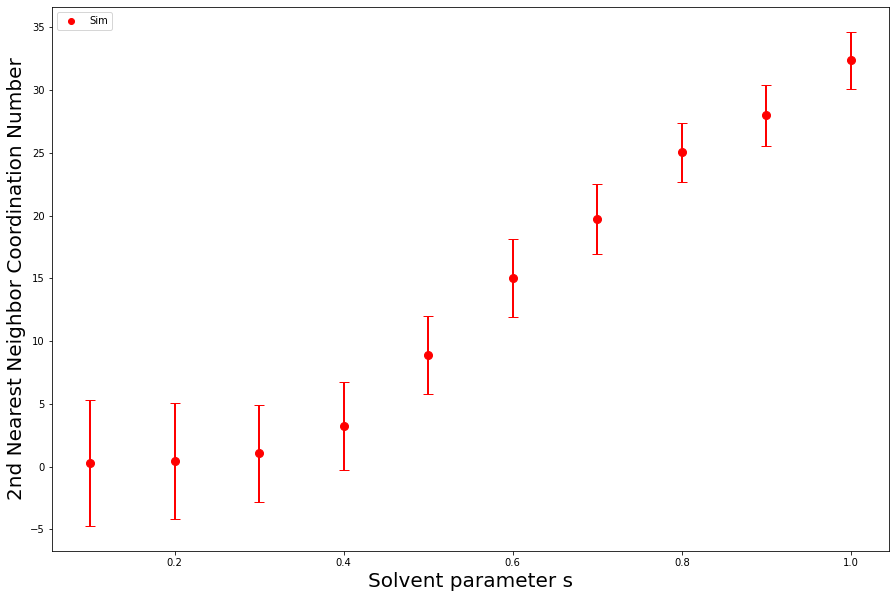

In [30]:
s = data["s"]
sigma = data["sigma"]


'''PLOT DATA'''
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(s, data["coord2_avg"], "o", label="Sim", color="red", linestyle="none")
ax.errorbar(s, data["coord2_avg"], fmt="o", xerr=0,yerr=sigma, color="red", lw=2, ms=8, zorder=666, capsize=5)

'''Plot Model'''
#ax.fill_between(s, data["coord_avg"] + sigma, data["coord_avg"] - sigma, color="#FFAAAA", lw=0, alpha=0.75, label = "1-sigma")


ax.set_xlabel("Solvent parameter s", fontsize=20)
ax.set_ylabel("2nd Nearest Neighbor Coordination Number", fontsize=20)

plt.legend(loc="upper left")
plt.savefig("figures/coord2_s.png", bbox_inches="tight")
plt.show()